# <center><font color=Purple> Matthew Bowen's Final Project</font></center>

# Preliminary set up and data retrieval

## Used Libraries

Here are the libraries I used in this project and also my API key to link to Kaggle data sets.

In [ ]:
!pip install kaggle
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
token={"username":"mattbowen13","key":"29cf0c9a31a14878fdd40d06180edb8f"}
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


## Get data from <font color=Red>kaggle</font>

Kaggle is a website that offers a no-setup, customizable, Jupyter Notebooks environment. Access free GPUs and a huge repository of community published data & code. Below is an example of a search for datasets including the keyword "instacart"; this project involves the first one listed by psparks.

![picture](https://drive.google.com/uc?export=view&id=1E9LbLSzPfX2Q6A3NqnDUUPi9isKw4fb3)

### Download desired dataset

In [ ]:
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(token, file)
!kaggle config ser -n path -v{/root}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d psparks/instacart-market-basket-analysis -p /content
!unzip \*.zip

usage: kaggle config [-h] {view,set,unset} ...
kaggle config: error: argument command: invalid choice: 'ser' (choose from 'view', 'set', 'unset')
instacart-market-basket-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  instacart-market-basket-analysis.zip
  inflating: aisles.csv              
  inflating: departments.csv         
  inflating: order_products__prior.csv  
  inflating: order_products__train.csv  
  inflating: orders.csv              
  inflating: products.csv            


### Unzip data and assign variables to read it

Reading the data of csv files into dataframe variables allows me to manipulate them with the imported libraries.

In [ ]:
aisles = pd.read_csv('aisles.csv')
departments=pd.read_csv('departments.csv')
orders=pd.read_csv('orders.csv')
order_products__prior=pd.read_csv('order_products__prior.csv')
order_products__train=pd.read_csv('order_products__train.csv')
products=pd.read_csv('products.csv')

#### Create dictionaries to define terms within the dataframes

These dictionaries give context to what all of the variable names and labels mean so it can be referenced if needed.

In [ ]:
feature_meaning={'aisle_id':'aisle identifier', 'aisle':'the name of the aisle', 'department_id':'Number to discern the different departments', 'department':'The name of the departments', 'order_id':"ID to differentiate customers' orders", 'product_id':'The unique ID of an item', 'add_to_cart_order':'The order the products in an order were added to the cart', 'reordered':'Notes how many times an item has been reordered by a customer', 'user_id':"customer identifier", 'eval_set':'Flags an order as either prior or train', 'order_number':'the order sequence number for this user (1 = first, n = nth)', 'order_dow':'the day of the week the order was placed on', 'order_hour_of_day':'hour of day order was', 'days_since_prior_order':'days since last order capped at 30', 'product_name':'Name of product'}
table_meaning={'aisles':'Shows what is in every aisle', 'departments':'Shows the different departments', 'order_products_prior':"Shows the products ordered on trained employees' orders", "order_products_train":"Shows products ordered on trainees' orders", 'prodcuts':'Further details the products ordered', 'orders':'Gives information about each order completed'}


# Manipulate data to answer questions

## How many aisles contain the word *meat*?

First, I wanted to see how many aisle names contain the word "meat". I thought it would be an interesting distinction as more diet appear with less of a focus on meat.

### Manipulate data to find answer

This was a simple process as all I had to do was filter the data based on it containing the word "meat".

In [ ]:
aisles[aisles.aisle.str.contains('meat')]
aisles['meat'] = aisles.aisle.str.contains('meat')

### Plot the results

I found that a pie chart would be the simplest way to show the distinction as it is an obvious boolean comparison.

Text(0.5, 1.0, 'Meat is in aisle name')

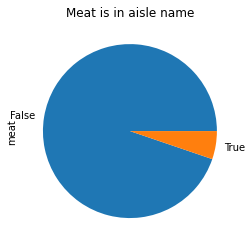

In [ ]:
display(aisles.meat.value_counts().plot.pie().set_title("Meat is in aisle name"))

## How many items are unique (not reordered)?

Next I wanted to compare items that were unique to the data sets and products that were reordered at least once.

### Manipulate the data to find answer

I looked specifically in the order_products__train dataframe to find the data I needed, then grouped it by if an item was reordered.

In [ ]:
opt=order_products__train[['product_id' , "reordered"]]
huh=opt.groupby('reordered').count().agg(lambda x: x.tolist())

### Plot the results

A bar graph was a simple way to display if something was reordered or not as it was another boolean comparison.

Text(0.5, 1.0, 'Unique vs reordered items')

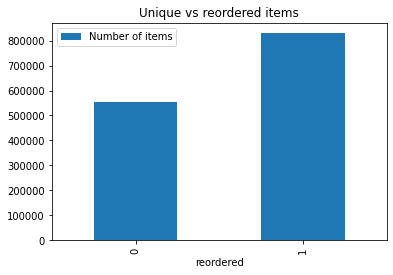

In [ ]:
fig, ax = plt.subplots()
display(huh.plot(kind='bar', ax=ax).set_title('Unique vs reordered items'))
ax.legend(["Number of items"])

## How many characters are in all of the department titles?

Now I wanted to see how many department titles have specific character legnths. I originally wanted to use my findings here to see if there was a correlation to department title length and how many products are ordered from them but I could not find a good way to do so.

### Manipulate the data top find answer

I filtered departments to just their name and then counted each one.

In [ ]:
dp1 = departments[['department_id']]
nd = pd.DataFrame()
for row in departments[["department"]]:
  nd[row]=departments[row].str.len()
nd[[row]]
dp2 = nd.rename(columns = {'department':'characters in department name'})

### Plot the results

A bar graph was used once again to show the relation between each length.

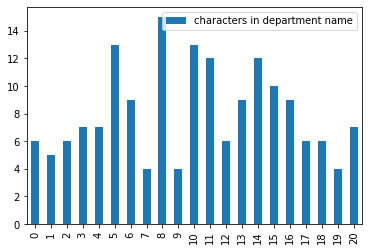

In [ ]:
display(dp2.plot.bar())

## What is the average time of day compared to the number of orders per unique user?

This was my most interesting finding as I wanted to see if the most repeated users ordered at a certain time of day compared to less avid users.

### Manipulate the data to find answer

My messy process was pretty much to sort the orders multiple times until I could count how many orders each user had and the average time of day for all those orders.

In [ ]:
orders1 = orders[['order_id', 'user_id']]
orders2 = orders1.groupby('user_id').count().agg(lambda x: x.tolist())
orders2 = orders2.rename(columns = {'user_id':'user id', 'order_id':'number of orders'})
orders3 = orders[['user_id', 'order_hour_of_day']]
orders4 = orders3.groupby('user_id').mean()
orders4 = orders4.rename(columns = {'user_id':'user id','order_hour_of_day':'average time of day'})
orders5 = pd.concat([orders2, orders4], axis=1)
orders6 = orders5[0:2500]

### Plot the result

A scatter plot allows you to see the trend in that most users order around the middle of the day with the most avid users only ordering between 7AM and 6PM.

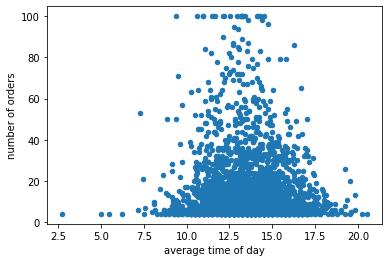

In [ ]:
display(orders6.plot.scatter(x="average time of day", y="number of orders"))

## How many products are there in each department?

This was an interesting question and could be used to further compare to other data to answer numerous questions.

### Manipulate the data to find answer

I just counted the products and compared them against the department id while counting them all.

In [ ]:
products1 = products[['product_id', 'department_id']]
products2 = products1.groupby('department_id').count()
products2 = products2.rename(columns= {'department_id':'department number', 'product_id':'number of products'})

### Plot the result

A bar graph was an easy way to see the differences quickly and efficiently.

Text(0.5, 1.0, 'number of products in departments')

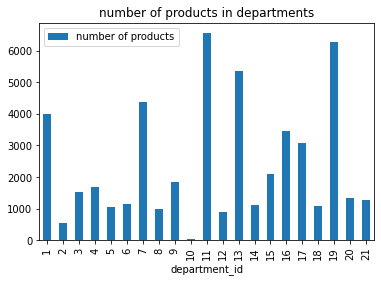

In [ ]:
display(products2.plot.bar().set_title('number of products in departments'))

## How many unique orders do we have?

The dataframe "orders" is already separatated by order id, so the length  of the dataframe is the unique orders

In [ ]:
len(orders)

3421083

## What is the most popular first item to add to the cart?

Combine the two dataframes that detail orders and product ids together

In [ ]:
carts=pd.concat([order_products__prior, order_products__train, orders])

Group and count by the product id to find the highest number

In [ ]:
first_to_cart=carts[carts.add_to_cart_order==1]
fi=first_to_cart.groupby('product_id').count()['order_id']
fi.max()

115521

Take that number and find the product id realted to it

In [ ]:
fi[fi==115521]

product_id
24852.0    115521
Name: order_id, dtype: int64

Find the name of the product from the id you found

In [ ]:
products[products.product_id==24852]

,product_id,product_name,aisle_id,department_id
24851,24852,Banana,24,4


Bananas!

![picture](https://drive.google.com/uc?export=view&id=148pXtv8hk7Tir6wK6-5xP6gTreEiCW3x)

# Thank you!

I hoped you found my data interesting! Please let me know if you found this useful by emailing me any comments or questions to bowenmb01@mail.buffalostate.edu . Now go out any gather some data!